### Laboratorio Bicicletas

In [83]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
from sklearn import linear_model
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [5]:
df = pd.read_csv('databici.csv')
df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


#### 1. ¿Qué rango de hora es la de mayor demanda?

In [6]:
byhr = df[['hr','cnt']].groupby('hr', as_index=False).sum().sort_values('cnt', ascending=False).reset_index(drop=True)
byhr.head()

,hr,cnt
0,17,336860
1,18,309772
2,8,261001
3,16,227748
4,19,226789


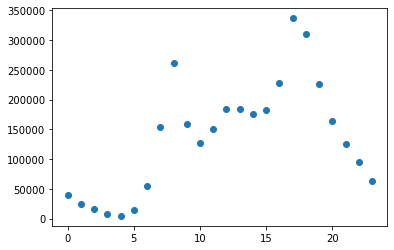

In [7]:
plt.scatter(x=byhr.hr, y=byhr.cnt)
plt.show()

> La mayor demanda se presenta a las 17 horas

#### 2. ¿Qué temporada es la mas alta?

In [8]:
bysea = df[['season','cnt']].groupby('season', as_index=False).sum().sort_values('cnt', ascending=False).reset_index(drop=True)
bysea.head()

,season,cnt
0,3,1061129
1,2,918589
2,4,841613
3,1,471348


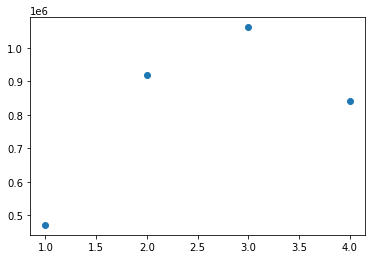

In [9]:
plt.scatter(x=bysea.season, y=bysea.cnt)
plt.show()

> La temporada con más demanda es el otoño (3)

#### 3. ¿Es la temperatura relevante para el modelo?

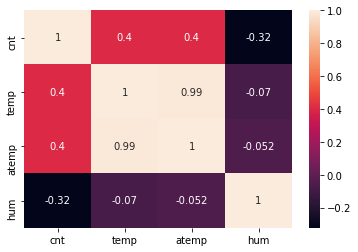

In [10]:
sn.heatmap(df[['cnt','temp','atemp','hum']].corr(), annot=True)
plt.show()

In [11]:
df.corr()['cnt'][['atemp','temp']]

atemp    0.400929
temp     0.404772
Name: cnt, dtype: float64

> Revisando todas las correlaciones, la temperatura, tanto *temp* como *atemp* son las de mayor relevancia para el modelo con correlaciones mayores a 0.4

#### 4. ¿Es la humedad relevante para el modelo?

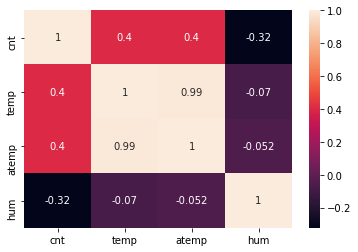

In [12]:
sn.heatmap(df[['cnt','temp','atemp','hum']].corr(), annot=True)
plt.show()

In [13]:
df.corr()['cnt']['hum']

-0.3229107408245637

> La humedad es la cuarta variable más relevante para el modelo con una correlación negativa de 0.32 (casual y registered no fueron tomadas en cuenta porque son segmentaciones de cnt, la variable objetivo)

#### 5. ¿Qué condiciones serian ideales para nuestra demanda?

Para definir condiciones ideales primero observo las variables que tienen mayor correlación respecto a la demanda:

In [85]:
df.corr()['cnt'].sort_values(ascending=False)

cnt           1.000000
registered    0.972151
casual        0.694564
temp          0.404772
atemp         0.400929
hr            0.394071
instant       0.278379
yr            0.250495
season        0.178056
mnth          0.120638
windspeed     0.093234
workingday    0.030284
weekday       0.026900
holiday      -0.030927
weathersit   -0.142426
hum          -0.322911
Name: cnt, dtype: float64

<AxesSubplot:xlabel='temp', ylabel='cnt'>

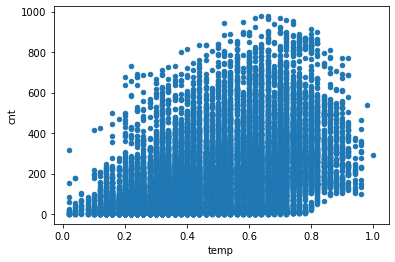

In [87]:
df.plot.scatter(x='temp', y='cnt')
plt.show()

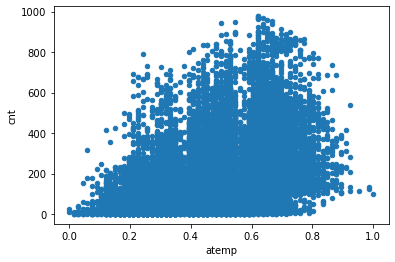

In [89]:
df.plot.scatter(x='atemp', y='cnt')
plt.show()

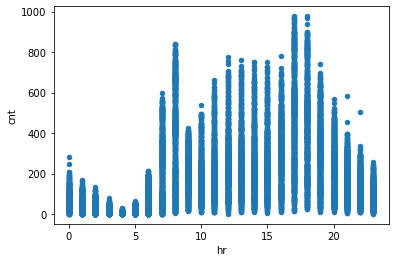

In [94]:
df.plot.scatter(x='hr', y='cnt')
plt.show()

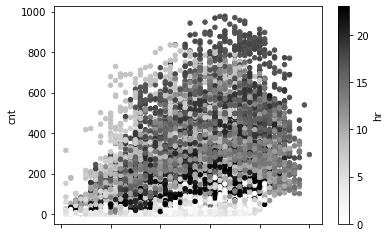

In [104]:
df.plot.scatter(x='temp', y='cnt', c='hr')
plt.show()

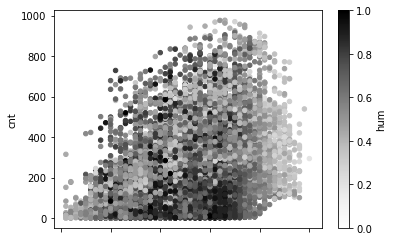

In [102]:
df.plot.scatter(x='temp', y='cnt', c='hum')
plt.show()

> Condiciones ideales para la demanda según los gráficos de dispersión: 
> 1. Horarios de mañana y tarde pero no de madrugada
> 2. Temperaturas entre 0.8 y 0.9
> 3. Humedades bajas

## Modelo

In [98]:
x = df[['temp','atemp','hr']]
y = df['cnt']

In [99]:
reg = linear_model.LinearRegression()

In [100]:
k=5
kf = KFold(n_splits=k)
all_rmse = []
all_r2 = []
all_b0 = []
all_b1 = []
all_b2 = []
all_b3 = []

for train_index, test_index in kf.split(x): 
    #print("TRAIN:", train_index, "TEST:", test_index)
    x_train, x_test = x.iloc[train_index], x.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    # Performance
    reg.fit(x_train,y_train)
    y_test_h = reg.predict(x_test)
    rmse = mean_squared_error(y_test, y_test_h)
    r2 = r2_score(y_test, y_test_h)
    all_rmse.append(rmse)
    all_r2.append(r2)
    
    # Parámetros
    all_b0.append(reg.intercept_)
    all_b1.append(reg.coef_[0])
    all_b2.append(reg.coef_[1])
    all_b3.append(reg.coef_[2])

avg_rmse = sum(all_rmse)/k
avg_r2 = sum(all_r2)/k

avg_b0 = sum(all_b0)/k
avg_b1 = sum(all_b1)/k
avg_b2 = sum(all_b2)/k
avg_b3 = sum(all_b3)/k
 
print('rmse of each fold - {}'.format(all_rmse))
print('r2 of each fold - {}'.format(all_r2))
print('avg rmse : {}'.format(avg_rmse))
print('avg r2 : {}'.format(avg_r2))
print('avg_b0')
print(avg_b0)
print('avg_b1')
print(avg_b1)
print('avg_b2')
print(avg_b2)
print('avg_b3')
print(avg_b3)

rmse of each fold - [12565.362144415296, 25376.102748232286, 14034.985002993848, 37132.353840832846, 42136.089928700545]
r2 of each fold - [-0.04217914430621472, -0.13621957716170519, 0.16580422404696216, 0.20038550596121774, 0.13348734257098338]
avg rmse : 26248.978733034968
avg r2 : 0.06425567022224868
avg_b0
-84.809857515828
avg_b1
276.7512753175649
avg_b2
69.76043280051583
avg_b3
9.044847663752593


### Resultado del modelo final (Demanda de bicicletas ~ temp + atemp + hr)

$\hat{y} = -84.81 + 276.75temp + 69.76atemp + 9.04hr$